In [1]:
library(tidyverse)
library(janitor)
library(tidyr)
library(cowplot)
library(flextable)
library(dlookr)
library(caret)

── Attaching packages ──────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘flextable’


The following object is masked from ‘package:purrr’:

    compose



Attaching package: ‘dlookr’


The following object is masked from ‘package:tidyr’:

    extract


The following object is masked from ‘package:base’:

    transform


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [9]:
# Load data
raw_data  <- read.table("../../data/raw_student-mat.csv", sep= ";", header=TRUE) 

# Data set for eda

In [10]:
eda_data  <-  
    raw_data  %>% 
        clean_names() %>% 
  
        # Transform variables to numeric
        mutate(g3 = as.numeric(g3),
               g2 = as.numeric(g2),
               g1 = as.numeric(g1)) %>%
        
        # Transform chr type to factor
        mutate(across(where(is.character), as.factor)) %>% 
        
        # Transform intergers to factor except absences and age  
        mutate(across(where(is.integer), as.factor)) %>%
  
        # Add g3 as binary for part A2 of the project         
        mutate(g3_binary = factor(if_else(g3 >= 10,"pass","fail" )))   


In [11]:
str(eda_data)

'data.frame':	395 obs. of  34 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : Factor w/ 8 levels "15","16","17",..: 4 3 1 1 2 2 2 3 1 1 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ medu      : Factor w/ 5 levels "0","1","2","3",..: 5 2 2 5 4 5 3 5 4 4 ...
 $ fedu      : Factor w/ 5 levels "0","1","2","3",..: 5 2 2 3 4 4 3 5 3 5 ...
 $ mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: Factor w/ 4 levels "1","2","3","4": 2 1 1 1 1 1 1 

In [14]:
dim(eda_data)

[1] 395  34

In [15]:
# Set names, exclude response variables (g3 and g3_binary)
predictors_names <- set_names(names(eda_data)[-c(33:34)])

# Figure 1

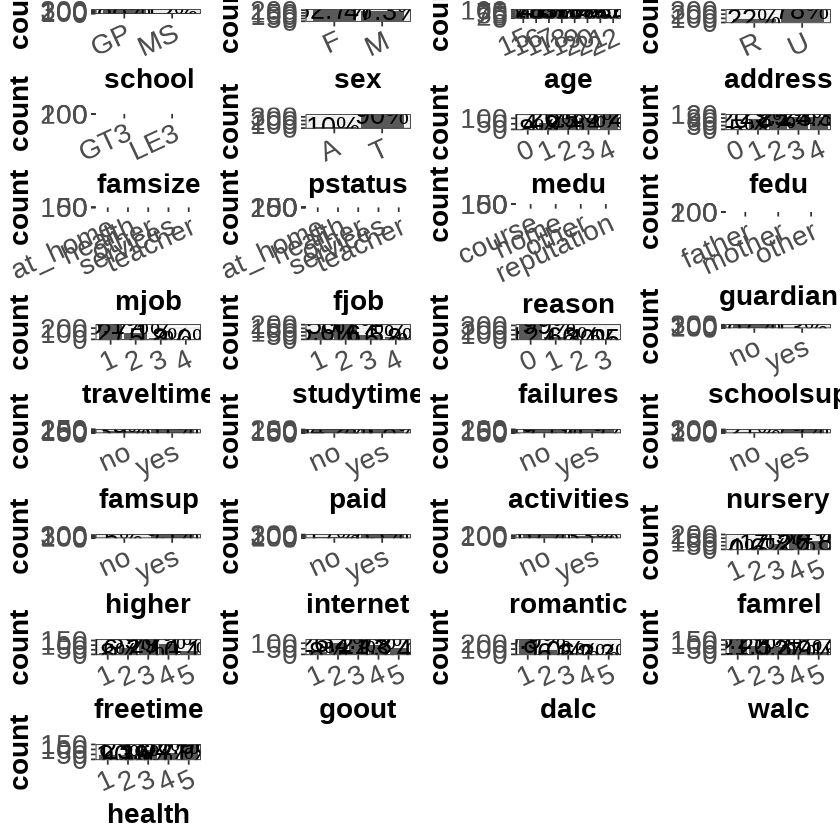

In [16]:
histogram_plot <-  function(x) {
     ggplot(eda_data, aes(x = .data[[x]])) +
          geom_bar()  +
          geom_text(aes(label = scales::percent(..prop..), group = 1), 
                    stat= "count", position = position_dodge(width = 0.9), 
                    size = 7) +
          theme_bw() +
          #scale_y_continuous(labels = scales::percent) +
          theme(axis.text=element_text(size = 21),
                axis.title=element_text(size = 21,face = "bold"),
                axis.text.x = element_text(angle = 25, hjust = 1)) 
}

plots_predictors <- map(predictors_names[-c(30,31,32)], ~ histogram_plot(.x) ) 

cowplot::plot_grid(plotlist = plots_predictors, ncol = 4)

# Table 1

In [17]:
(table_1 <-   
  eda_data %>% 
    select(g1, g2, g3) %>% 
    describe() %>%
    flextable())

a flextable object.
col_keys: `variable`, `n`, `na`, `mean`, `sd`, `se_mean`, `IQR`, `skewness`, `kurtosis`, `p00`, `p01`, `p05`, `p10`, `p20`, `p25`, `p30`, `p40`, `p50`, `p60`, `p70`, `p75`, `p80`, `p90`, `p95`, `p99`, `p100` 
header has 1 row(s) 
body has 3 row(s) 
original dataset sample: 
  variable   n na     mean       sd   se_mean IQR   skewness   kurtosis p00 p01
1       g1 395  0 10.90886 3.319195 0.1670068   5  0.2406132 -0.6938295   3   5
2       g2 395  0 10.71392 3.761505 0.1892618   4 -0.4316454  0.6277056   0   0
3       g3 395  0 10.41519 4.581443 0.2305174   6 -0.7326724  0.4034208   0   0
  p05 p10 p20 p25 p30 p40 p50 p60 p70 p75 p80  p90  p95 p99 p100
1   6   7   8   8   9  10  11  12  13  13  14 16.0 16.0  18   19
2   5   6   8   9   9  10  11  12  13  13  14 15.0 16.3  18   19
3   0   5   8   8   9  10  11  12  13  14  14 15.6 17.0  19   20

# Table 2

In [18]:
(table_2 <- 
    eda_data %>% 
      select(g3,g2,g1) %>% 
      cor() %>%
      as.data.frame() %>% 
      flextable())

a flextable object.
col_keys: `g3`, `g2`, `g1` 
header has 1 row(s) 
body has 3 row(s) 
original dataset sample: 
          g3        g2        g1
g3 1.0000000 0.9048680 0.8014679
g2 0.9048680 1.0000000 0.8521181
g1 0.8014679 0.8521181 1.0000000

# Figure 2

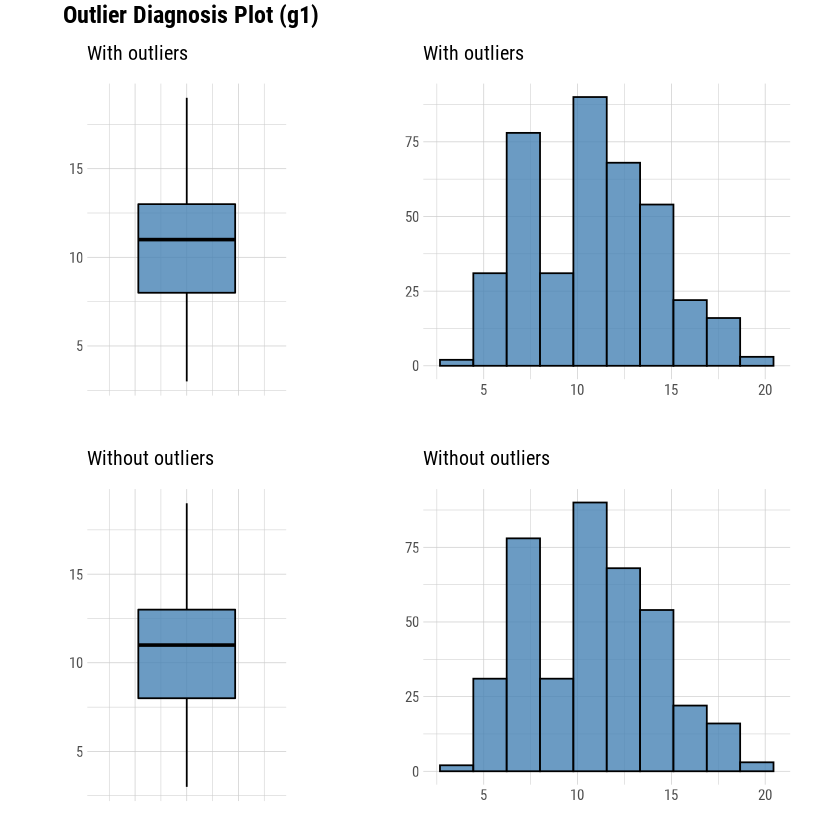

In [19]:
g1_plot_outliers <- 
eda_data %>%  
  plot_outlier(g1) 

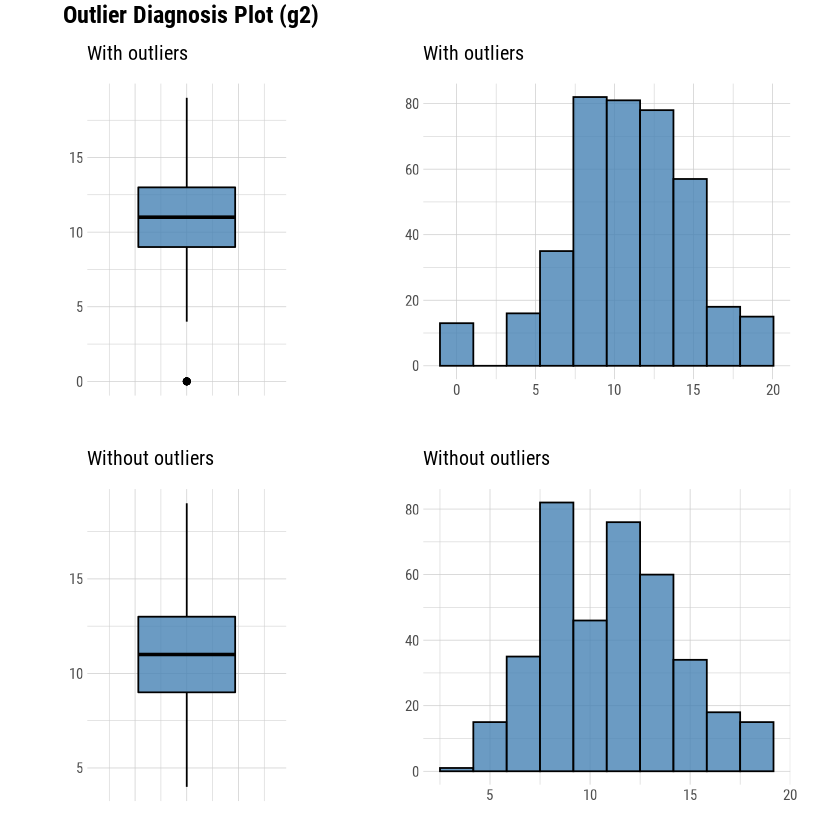

In [20]:
g2_plot_outliers <- 
eda_data %>%  
  plot_outlier(g2) 

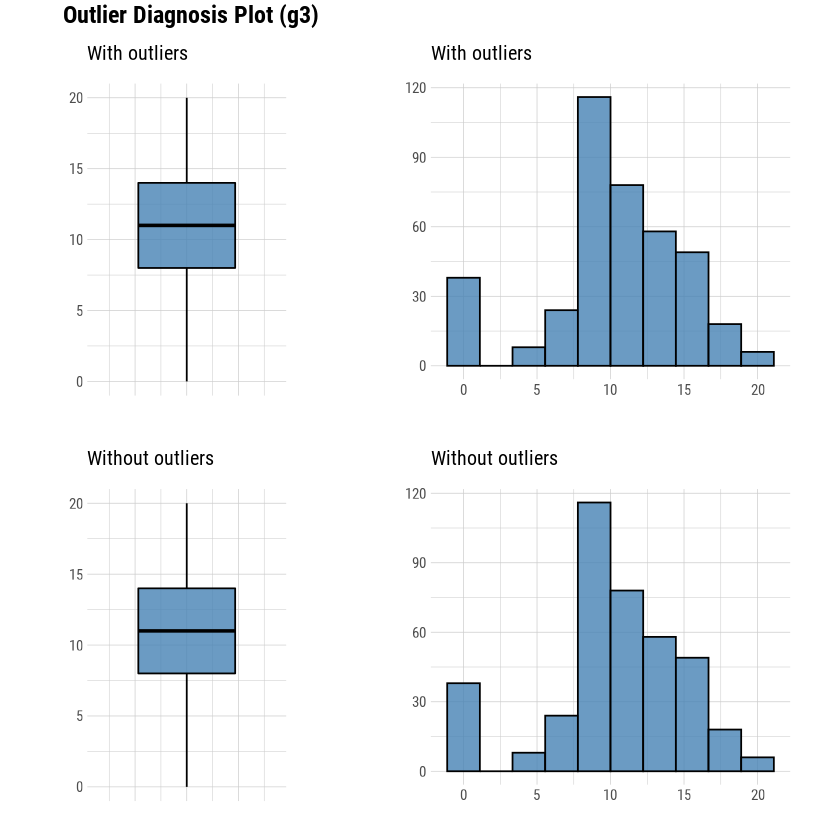

In [21]:
g3_plot_outliers <- 
eda_data %>%  
  plot_outlier(g3) 

# Figure 3

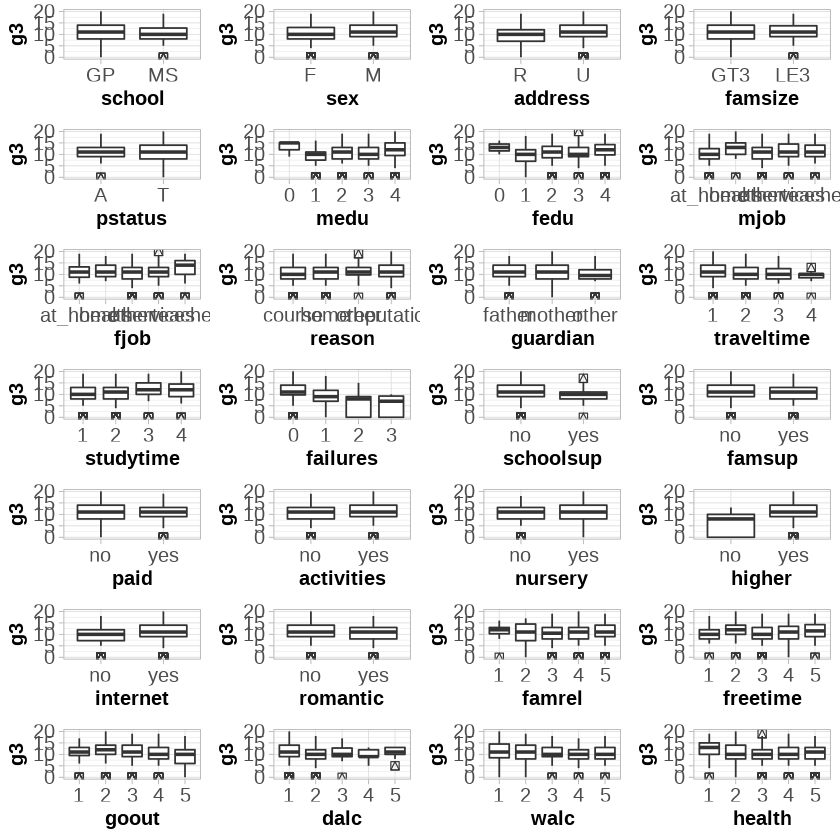

In [22]:
g3_boxplot <-  function(x) {
    ggplot(eda_data, aes(y = g3, x = .data[[x]])) +
     #geom_col(position = "fill") +
    geom_boxplot(outlier.shape = 14, outlier.size=2) +
    theme_light() +
    theme(axis.text=element_text(size = 15),
          axis.title=element_text(size = 15,face = "bold"),
          legend.position = "top",
          legend.key.size = unit(0.5, 'cm'),
          legend.title = element_text(size = 15)) 
          #legend.text = element_text(size = 12)) 

}


boxplots_g3 <- map(predictors_names[-c(3,30,31,32)], ~ g3_boxplot(.x) ) 

cowplot::plot_grid(plotlist = boxplots_g3 , ncol = 4)

# Table 3

In [23]:
(table_3 <- 
  eda_data %>% 
  select(-c(g1,g2,g3,g3_binary)) %>% 
  nearZeroVar(., saveMetrics= TRUE) %>% 
  flextable())

a flextable object.
col_keys: `freqRatio`, `percentUnique`, `zeroVar`, `nzv` 
header has 1 row(s) 
body has 30 row(s) 
original dataset sample: 
        freqRatio percentUnique zeroVar   nzv
school   7.586957     0.5063291   FALSE FALSE
sex      1.112299     0.5063291   FALSE FALSE
age      1.061224     2.0253165   FALSE FALSE
address  3.488636     0.5063291   FALSE FALSE
famsize  2.464912     0.5063291   FALSE FALSE